In [27]:
import pandas as pd
import numpy as np
# import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.utils import resample

import warnings
warnings.filterwarnings('ignore')

In [28]:
train_df = pd.read_csv("/Users/amirzadc/Library/CloudStorage/OneDrive-WBA/Documents/Project_WH/ML_Projects/ECG Heartbeat Categorization Dataset/mitbih_train.csv", header=None)
test_df = pd.read_csv("/Users/amirzadc/Library/CloudStorage/OneDrive-WBA/Documents/Project_WH/ML_Projects/ECG Heartbeat Categorization Dataset/mitbih_test.csv", header=None)


In [29]:
train_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
train_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
count,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000
mean,0.890360,0.758160,0.423972,0.219104,0.201127,0.210399,0.205808,0.201773,0.198691,0.196757,...,0.005025,0.004628,0.004291,0.003945,0.003681,0.003471,0.003221,0.002945,0.002807,0.473376
std,0.240909,0.221813,0.227305,0.206878,0.177058,0.171909,0.178481,0.177240,0.171778,0.168357,...,0.044154,0.042089,0.040525,0.038651,0.037193,0.036255,0.034789,0.032865,0.031924,1.143184
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.921922,0.682486,0.250969,0.048458,0.082329,0.088416,0.073333,0.066116,0.065000,0.068639,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.991342,0.826013,0.429472,0.166000,0.147878,0.158798,0.145324,0.144424,0.150000,0.148734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.910506,0.578767,0.341727,0.258993,0.287628,0.298237,0.295391,0.290832,0.283636,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


In [21]:
target = train_df[187].astype(float).astype(int)
label_dist = target.value_counts()
label_dist

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64

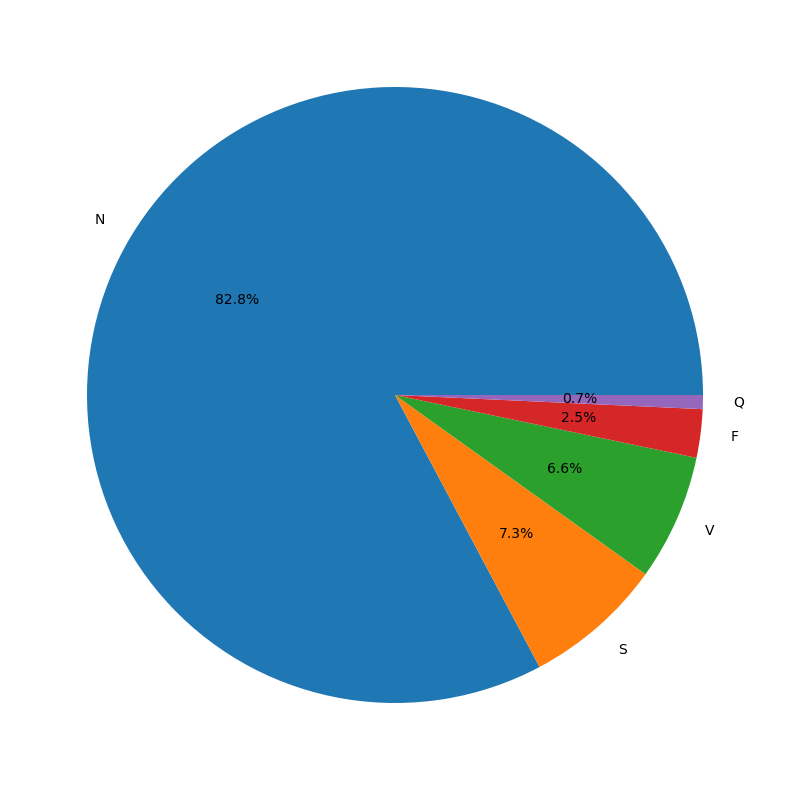

In [22]:
plt.figure(figsize = (20,10)) 
label = ['N', 'S', 'V', 'F', 'Q'] 
plt.pie(label_dist, labels = label, autopct = "%1.1f%%")
plt.show()

In [7]:
train_df[187] = train_df[187].astype(float).astype(int)

In [8]:
label_0_df= train_df[train_df[187]==0]
label_1_df= train_df[train_df[187]==1]
label_2_df= train_df[train_df[187]==2]
label_3_df= train_df[train_df[187]==3]
label_4_df= train_df[train_df[187]==4]

label_0_df = label_0_df.sample(n=17500,random_state=42)
label_1_df = resample(label_1_df,replace=True,n_samples=17500,random_state=42)
label_2_df = resample(label_2_df,replace=True,n_samples=17500,random_state=42)
label_3_df = resample(label_3_df,replace=True,n_samples=17500,random_state=42)
label_4_df = resample(label_4_df,replace=True,n_samples=17500,random_state=42)


In [9]:
train_resample_df = pd.concat([label_0_df,label_1_df,label_2_df,label_3_df,label_4_df])

In [10]:
train_resample_df.shape

(87500, 188)

In [23]:
target = train_resample_df[187]
label_dist = target.value_counts()
label_dist

0    17500
1    17500
2    17500
3    17500
4    17500
Name: 187, dtype: int64

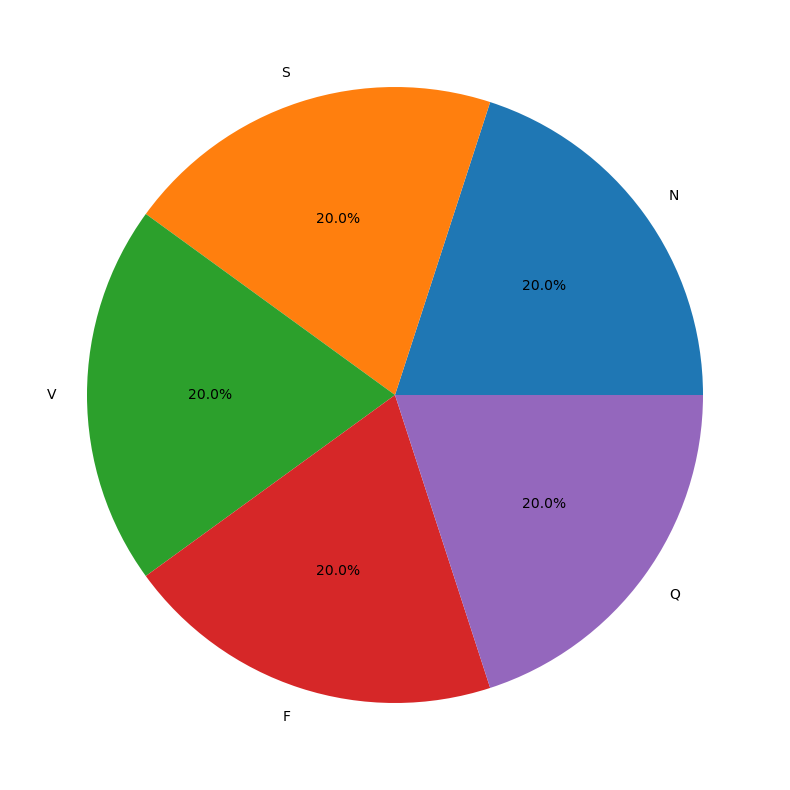

In [24]:
plt.figure(figsize = (20,10)) 
label = ['N', 'S', 'V', 'F', 'Q'] 
plt.pie(label_dist, labels = label, autopct = "%1.1f%%")
plt.show()

In [14]:
c=train_resample_df.groupby(187,group_keys=False).apply(lambda train_resample_df : train_resample_df.sample(1))
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
31096,1.000000,0.774436,0.278196,0.210526,0.233083,0.187970,0.195489,0.180451,0.218045,0.180451,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
74221,0.954751,1.000000,0.366516,0.000000,0.095023,0.167421,0.171946,0.171946,0.266968,0.244344,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
75284,0.980315,1.000000,0.913386,0.862205,0.791339,0.761811,0.722441,0.625984,0.391732,0.230315,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
81057,1.000000,0.872493,0.438395,0.289398,0.302292,0.214900,0.398281,0.000000,0.210602,0.147564,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
83418,1.000000,0.494915,0.488136,0.522034,0.532203,0.535593,0.525424,0.511864,0.430508,0.318644,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


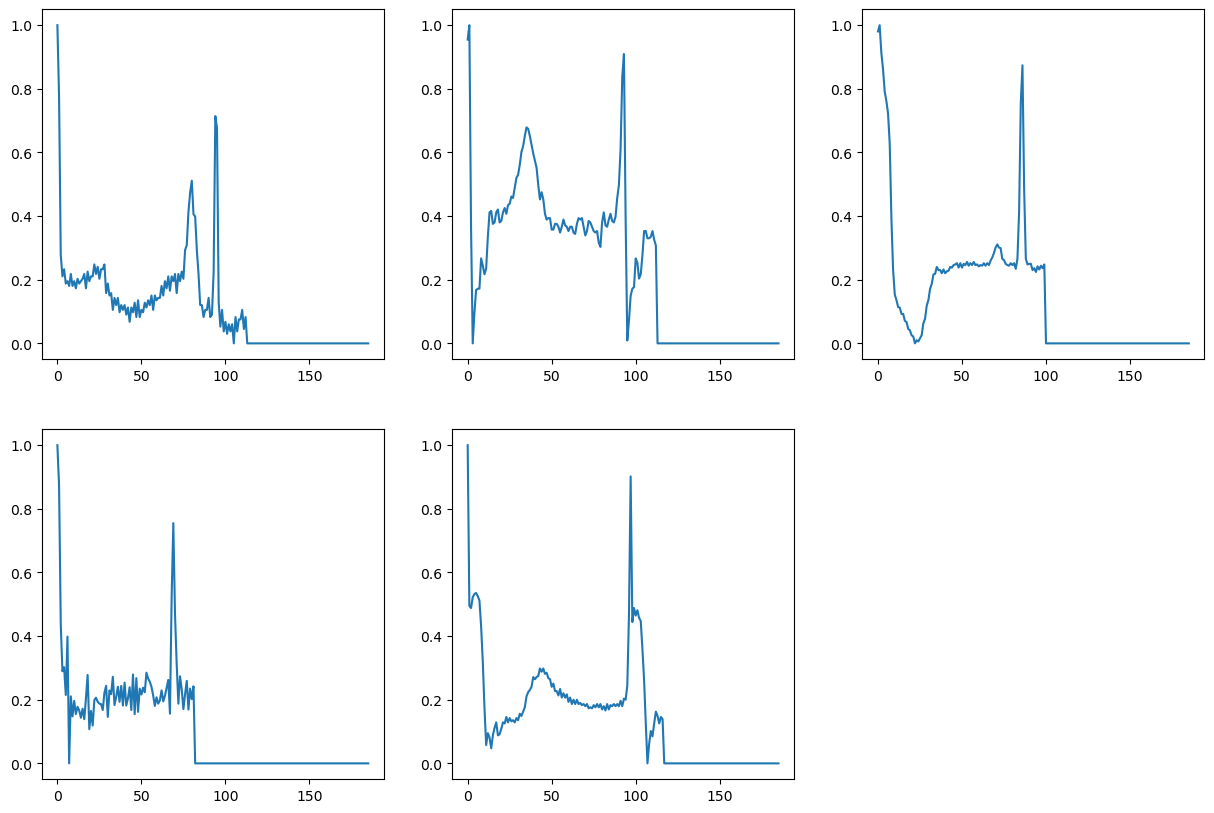

In [15]:
plt.figure(figsize=(15,10))
plt.subplot(231)
plt.plot(c.iloc[0,:186])

plt.subplot(232)
plt.plot(c.iloc[1,:186])

plt.subplot(233)
plt.plot(c.iloc[2,:186])

plt.subplot(234)
plt.plot(c.iloc[3,:186])

plt.subplot(235)
plt.plot(c.iloc[4,:186])


In [16]:
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
x_test  = test_df.iloc[:,:-1]
y_test  = test_df.iloc[:,-1].astype(int)

In [17]:
print("X test shape is : " + str(x_train.shape))
print("X test shape is : " + str(x_test.shape))

X test shape is : (87554, 187)
X test shape is : (21892, 187)


In [18]:
print("Y test shape is : " + str(y_train.shape))
print("Y test shape is : " + str(y_test.shape))

Y test shape is : (87554,)
Y test shape is : (21892,)


## Exploring Testing dataset 

In [25]:
label_dist = y_test.value_counts()
label_dist


0    18118
4     1608
2     1448
1      556
3      162
Name: 187, dtype: int64

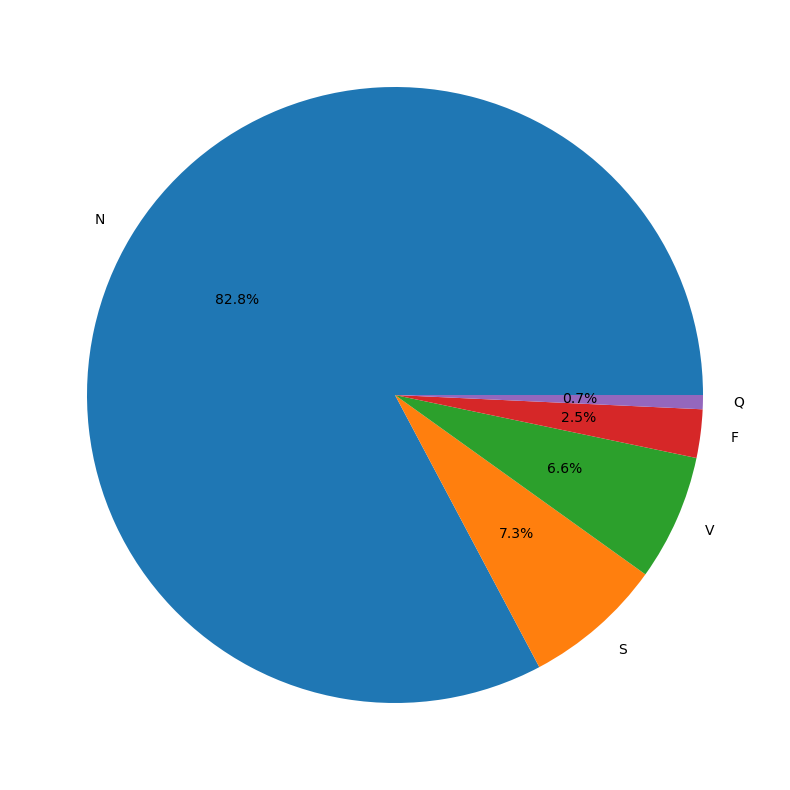

In [26]:
plt.figure(figsize = (20,10)) 
label = ['N', 'S', 'V', 'F', 'Q'] 
plt.pie(label_dist, labels = label, autopct = "%1.1f%%")
plt.show()